# 12 STOCHASTIC PROGRAMS, PROBABILITY, AND STATISTICS

<b>causal nondeterminism</b> :the belief that not every event is caused by previous events

<b>predictive nondeterminism</b>:  the concept that our inability to make accurate measurements about the physical world makes it impossible to make precise predictions about future states.

Many aspects of the world in which we live can be accurately modeled only as <b>stochastic processes</b>.

A process is stochastic if its next state depends upon both previous states and <b>some random element</b>.


## 12.1 Stochastic Programs

A program is <b>deterministic</b> if whenever it is run on <b>the same input</b>, it produces <b>the same output</b>.

Notice that "program is deterministic" is not the same as saying that the output is completely defined by the specification of the problem. 

For example, the specification of squareRoot:

```python
def squareRoot(x, epsilon):
    """Assumes x and epsilon are of type float; x >= 0 and epsilon > 0
    Returns float y such that x-epsilon <= y*y <= x+epsilon"""
```

This specification admits many possible return values for the function call ```squareRoot(2, 0.001)```. However, the successive approximation algorithm we looked at in Chapter 3 will always return the same value. The specification
doesn’t require that the implementation be deterministic, but it does allow deterministic implementations.



Not all interesting specifications can be met by deterministic implementations.
Consider, for example, implementing a program to play a dice game, say backgammon or craps.

```python
def rollDie():
    """Returns an int between 1 and 6"""
```

It would be better to specify that rollDie “returns a randomly chosen int between 1 and 6.”

Most programming languages, including Python, include simple ways to write programs that use randomness

The code uses one of several useful functions found in the imported Python standard library module <b>random</b>.
```python
import random
```
The function ```random.choice``` takes a non-empty sequence as its argument and returns a randomly chosen member of that sequence. 


In [ ]:
import random
a=random.random()
print(a)

Almost all of the functions  in random are built using the function ```random.random```, which generates a random
floating point number between 0.0 and 1.0

In [ ]:
import random
def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

Now, imagine running rollN(10). Would you be more surprised to see it print:

In [ ]:
rollN(10)

In [ ]:
rollN(10)

Each of these sequences is equally likely, because the value of each roll is independent of the values of earlier rolls. 

In a stochastic process two events are <b>independent</b> if the outcome of one event has no influence on the outcome of the other.

In general, when we talk about the probability of a result having some property (e.g., all 1’s) we are asking what fraction of all possible results has that property.

This is why probabilities range from 0 to 1. 

the probability of something happening and the probability of the same thing not happening must add up to 1.

## 12.2 Inferential Statistics and Simulation

The tiny program in Figure 12.1 is a <b>simulation model</b>. 

Rather than asking some person to roll a die multiple times, we wrote <b>a program to simulate</b> that activity.

We often use simulations to estimate the value of an unknown quantity by making use of the principles of <b>inferential statistics</b>. 

In brief, the guiding principle of inferential statistics is that <b>a random sample</b> tends to exhibit the <b>same properties</b> as <b>the population</b> from which it is drawn.

The function ```flip``` in Figure 12.2 simulates flipping a fair coin ```numFlips``` times, and returns the fraction of flips that came up <b>heads</b>.



In [ ]:
import random
#Page 156, Figure 12.2

def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1  #returns the fraction of flips that came up <b>heads</b>.
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    
    fracHeads = []
    
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    
    mean = sum(fracHeads)/len(fracHeads)
    
    return mean


In [ ]:
flipSim(100, 1)


In [ ]:
flipSim(100, 1)

It seems that it would be inappropriate to assume much (other than that the coin has both heads and tails) from any one trial of 100 flips.

That’s why we typically structure our simulations to include <b>multiple trials</b> and compare the
results

In [ ]:
flipSim(100, 100)

In [ ]:
flipSim(100, 100)

In [ ]:
flipSim(100, 10000)

In [ ]:
flipSim(100, 10000)

Now it seems we can safely conclude something about the next flip, i.e., that heads and tails are about equally likely. But why do we think that we can conclude that?

What we are depending upon is <b>the law of large numbers</b>

This law states that in repeated <b>independent</b> experiments, the <b>average</b> value of the experiments approaches the <b>expected</b> value as the number of experiments goes
to infinity.

The <b>gambler's fallacy</b> is when an individual erroneously believes that the onset of a certain random event is less likely to happen following an event or a series of events. This line of thinking is incorrect because past events do not change the probability that certain events will occur in the future. 

This line of thinking is incorrect because <b>past events</b> do not change the probability that <b>certain events will occur in the future</b>. 

Figure 12.3 contains a function, ```flipPlot```, that produces some plots intended to show the law of large numbers at work.

In [2]:
%matplotlib inline  
import pylab
#Page 158, Figure 12.3
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios)


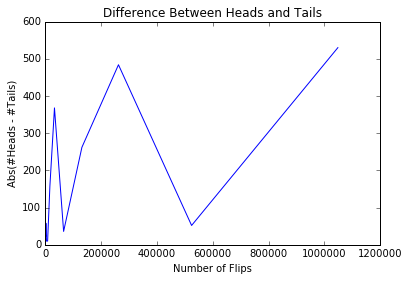

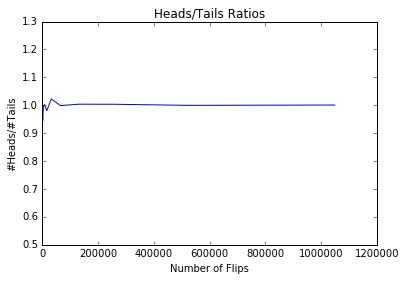

In [3]:
import random
random.seed(0)
flipPlot(4, 20)

The first plot seems to suggest that the absolute difference between the number of heads and the number of tails fluctuates in the beginning, crashes downwards, and then moves <b>rapidly upwards</b>. 

However, we need to keep in mind that we have <b>only two data points to the right of x = 300,000</b>. That ```pylab.plot```  <b>connected these points</b> with lines may <b>mislead</b> us into seeing trends when all we have are isolated points. 

This is not an uncommon phenomenon, so you should always ask <b>how many points</b> a plot actually contains before jumping to any conclusion about what it means.

In the second plot right, which is mostly a <b>flat</b> line. This too is <b>deceptive</b>. Even though there are sixteen data points, most of them are <b>crowded</b> into a small amount of real estate on <b>the left side</b> of the plot, so that the <b>detail is impossible</b> to see.

These visualization problems are easy to address in PyLab.

We instruct our program to plot unconnected points, e.g., by writing pylab.plot(xAxis, diffs, 'bo').

We also instruct PyLab to use a logarithmic scale on either or both of the x and y axes


In [20]:
#Page 158, Figure 12.3
def flipPlot01(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
  
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    
    pylab.plot(xAxis, diffs,'bo')
    pylab.semilogx()
    pylab.semilogy()
    
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios,'bo')
    pylab.semilogx()
 

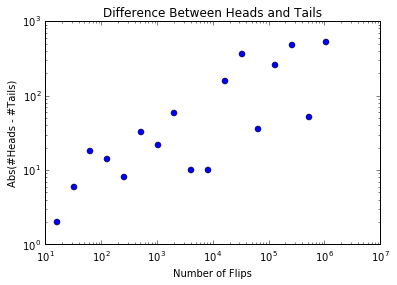

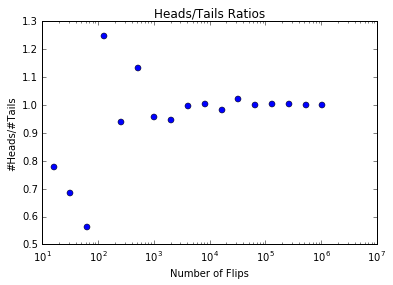

In [21]:
import random
random.seed(0)
flipPlot01(4, 20)

#### variance standard deviation coefficient of variation
2
It is neve
$\sigma(X)r 
If many values are relatively <b>far</b> from the mean, the standard deviation is relatively <b>large</b>. 

If all values are the <b>same</b>, the standard deviation is <b>zero</b>.

$\sigma(X) = possible to achieve perfect accuracy through sampling without sampling the entire population.

How many samples do we need to look at before we can have justified confidence in our answer? 

This depends on the <b>variance</b> in the underlying distribution.  Roughly speaking, variance is a measure of how much spread there is in the possible different outcomes.

We can formalize this notion relatively simply by using the concept of <b>standard deviation</b>.

Informally, the standard deviation tells us <b>what fraction of the values are close to the mean</b>. 

If many values are relatively <b>close</b> to the mean, the standard deviation is relatively <b>small</b>. 

If many values are relatively <b>far</b> from the mean, the standard deviation is relatively <b>large</b>. 

If all values are the <b>same</b>, the standard deviation is <b>zero</b>.


$\sigma(X)= \sqrt{ \frac{1}{|X|} \sum_{x\in X} {（x-\mu）}^2  }$

In [1]:
#Page 160, Figure 12.4
def stdDev(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5 #Square root of mean difference

We can use the notion of standard deviation to think about the relationship between the number of samples we have looked at and how much confidence we should have in the answer we have computed.

Figure 12.5 contains a modified version of ```flipPlot```.

In [2]:
%matplotlib inline  
import pylab
#Page 161, Figure 12.5
def makePlot(xVals, yVals, title, xLabel, yLabel, style,
             logX = False, logY = False):
    """Plots xVals vs. yVals with supplied titles and labels."""
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)
    
def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
         numTrials a positive integer
       Plots summaries of results of numTrials trials of
         2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             'Number of Flips', 'Standard Deviation', 'bo',
             logX = True, logY = True)

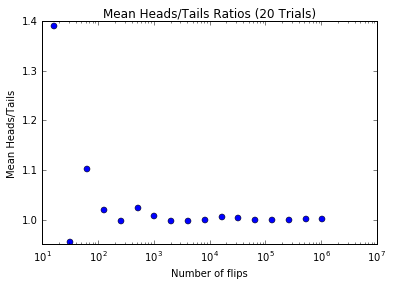

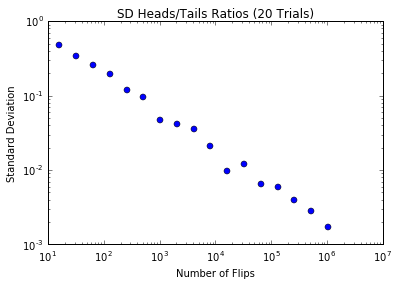

In [4]:
import random
flipPlot1(4, 20, 20)

What about the absolute difference between the number of heads and the number of tails?

In [5]:
#Page 162, Figure 12.6. code added to Figure 12.5

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
         numTrials a positive integer
       Plots summaries of results of numTrials trials of
         2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             'Number of Flips', 'Standard Deviation', 'bo',
             logX = True, logY = True)
    
    #  What about the absolute difference between the number of heads and the number of tails?   
    
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
             'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo',
             logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
             'Number of Flips', 'Standard Deviation', 'bo',
             logX = True, logY = True)

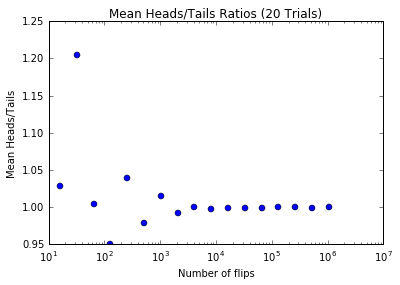

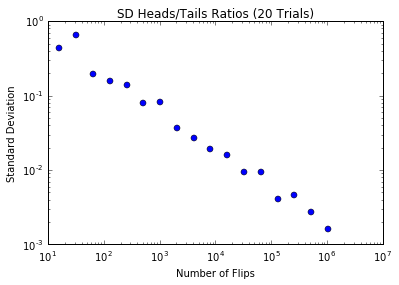

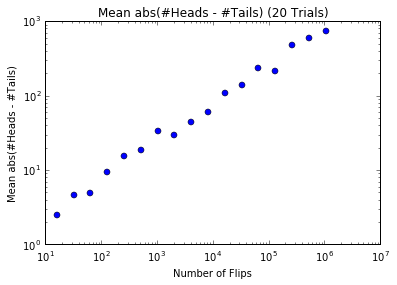

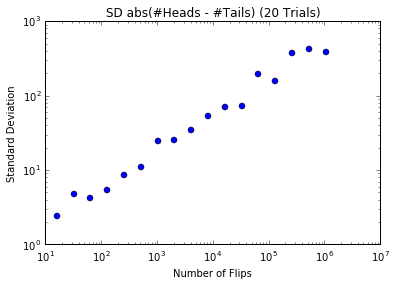

In [6]:
import random
flipPlot1(4, 20, 20)

But what’s up with the last plot? <b>The standard deviation is growing with the number of flips</b>

Does this mean that as the number of flips increases we should have less rather than more confidence in the estimate of the expected value of the difference between heads and tails?

No, it does not. The standard deviation should always be viewed in the context of the mean.

The <b>coefficient of variation</b> is the standard deviation divided by the mean.

When comparing data sets with highly variable means (as here), the coefficient of variation is often more informative than the standard deviation.

In [10]:
def CV(X):
    mean = sum(X)/float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [13]:
#Page 164, Figure 12.8
def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
         numTrials a positive integer
       Plots summaries of results of numTrials trials of
         2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    
    # coefficient of variation 
    ratiosCVs, diffsCVs = [], []
   
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
       
        # coefficient of variation 
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
   
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             'Number of Flips', 'Standard Deviation', 'bo',
             logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
         'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo',
         logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
         'Number of Flips', 'Standard Deviation', 'bo',
         logX = True, logY = True)
   
    # coefficient of variation 

    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips',
             'Coeff. of Var.', 'bo', logX = True, logY = True)
    
    
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips',
             'Coeff. of Var.', 'bo', logX = True)
 

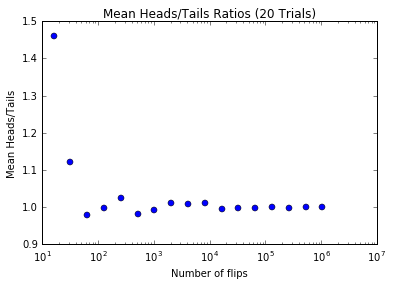

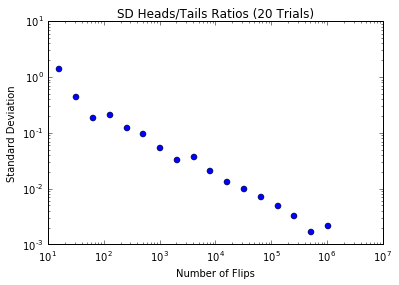

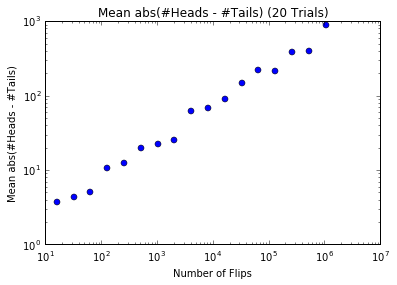

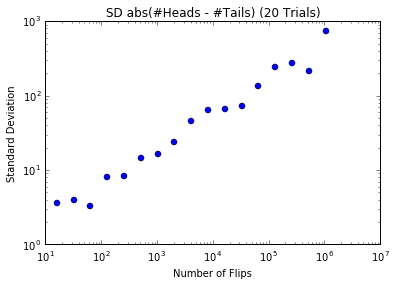

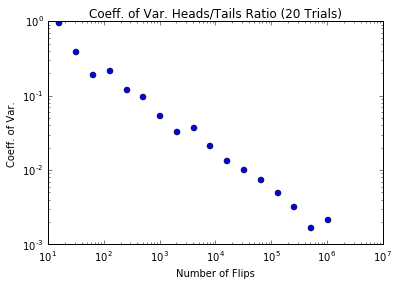

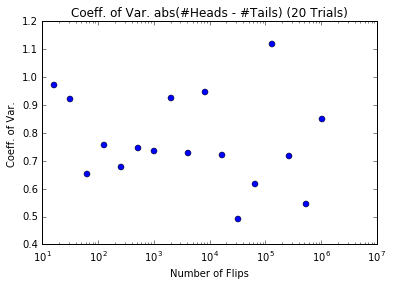

In [14]:
import random
flipPlot1(4, 20, 20)

we see that the plot of coefficient of variation for the heads/tails  ratio is not much different from the plot of the standard deviation.

On the other hand, the plot of the coefficient of variation for the absolute difference between heads and tails is a different story. Perhaps a trend would appear if we tried 1000 trials instead of 20. Let’s see



In [ ]:
import random
flipPlot1(4, 20, 100)

Beware that if the mean is near zero, small changes in the mean lead to large (but not necessarily meaningful) changes in the coefficient of variation. 

The standard deviation can be used to construct <b>a confidence interval</b>, but the coefficient of variation cannot.



## 12.3 Distributions

A <b>histogram</b> is a plot designed to show the distribution of values in a set of data.

(array([  18.,   57.,   90.,  140.,  187.,  196.,  144.,   95.,   56.,   19.]),
 array([   1. ,   20.9,   40.8,   60.7,   80.6,  100.5,  120.4,  140.3,
         160.2,  180.1,  200. ]),
 <a list of 10 Patch objects>)

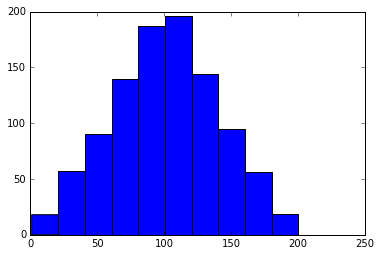

In [2]:
%matplotlib inline  
import pylab
import random

vals = [1, 200] #guarantee that values will range from 1 to 200
for i in range(1000):
    num1 = random.choice(range(1, 100))
    num2 = random.choice(range(1, 100))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)

Nevertheless, we are going to ask you to look at yet one more coin-flipping simulation

The simulation in Figure 12.9 illustrates more of PyLab’s plotting capabilities and gives us an opportunity to get a visual notion of what standard deviation means.

In [1]:
#Page 167, Figure 12.9

def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)), size='x-large')

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)


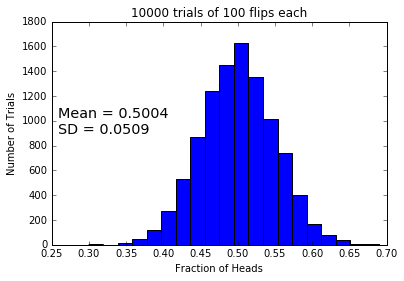

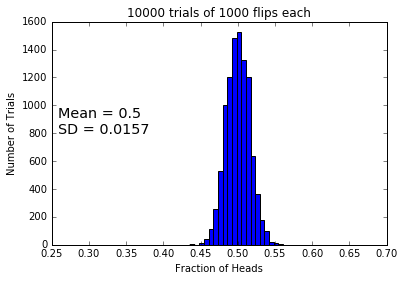

In [9]:
%matplotlib inline  
import pylab
import random

#Page 160, Figure 12.4
def stdDev(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5 #Square root of mean difference

random.seed(0)
makePlots(100,1000,10000)

Notice that while the means in both plots are about the same, the standard deviations are quite different

### 12.3.1 Normal Distributions and Confidence Levels


The distribution of results in each of these plots is close to what is called a <b>normal distribution </b>.

Technically speaking, a normal distribution is defined by the formula：

$f(x)= \frac{1}{\sigma \sqrt{2\pi}}$$*e^{-\frac{(x-\mu)^2}{2 \sigma ^2}}$

where $\mu$ is the mean, $\sigma$ the standard deviation, and e Euler’s number (roughly 2.718).

Normal distributions are frequently used in constructing probabilistic models for three reasons: 

1) they have nice mathematical properties,

2) many naturally occurring distributions are indeed close to normal, and 

3) they can be used to produce **confidence intervals**.
